In [1]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('products.csv' , sep='\t')

/tmp/ipykernel_886994/2405384287.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('products.csv' , sep='\t')


In [3]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

# Analyse et nettoyage du dataframe


## Nettoyage des variables

In [4]:
for cat in data:
    if (pd.isnull(data[cat]).sum()>100000 and cat!='pnns_groups_1'): #On séléctionne les variables ayant plus de 100k NaN
        data.drop(labels=cat, axis = 'columns', inplace=True) #On les supprime

In [5]:
data.shape

(320772, 33)

In [6]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,en:RO,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,0.0,b,NaN,

In [7]:
#On enlève les autres variables inutiles à la main

basket=['creator','created_t','created_datetime','last_modified_t','ingredients_text','nutrition-score-fr_100g',
        'brands_tags','countries','countries_tags','countries_fr', 'additives','additives_n','nutrition-score-uk_100g',
        'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','states','states_tags','states_fr', 'nutrition_grade_fr']
data.drop(labels=basket, axis=1, inplace=True)

In [8]:
data

,code,url,last_modified_datetime,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.57,0.00000,0.000
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,NaN,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,NaN,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,NaN,1552.0,1.43,NaN,77.14,NaN,8.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00000,0.000
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,Salty snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.loc[data['energy_100g'].isnull()]

,code,url,last_modified_datetime,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,18371,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:13Z,Real Salt Granular,Redmond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.15678,37.857
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,2015-06-17T10:11:54Z,Filet de bœuf,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,33084,http://world-fr.openfoodfacts.org/produit/0000...,2017-03-09T10:35:09Z,Fine Sea Salt,Unfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.90582,39.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,2015-11-01T11:20:39Z,Rillette d'oie,"Sans marque,D.Lambert",Fish Meat Eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320766,99410148,http://world-fr.openfoodfacts.org/produit/9941...,2017-04-03T18:34:58Z,NaN,NaN,Salty snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,Salty snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.loc[data['product_name'].isnull()]

,code,url,last_modified_datetime,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,7020254,http://world-fr.openfoodfacts.org/produit/0000...,2015-01-02T14:52:53Z,NaN,A&W,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,9336247,http://world-fr.openfoodfacts.org/produit/0000...,2016-11-13T09:40:10Z,NaN,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,50157846,http://world-fr.openfoodfacts.org/produit/0000...,2016-12-27T14:08:58Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,69105241,http://world-fr.openfoodfacts.org/produit/0000...,2016-06-26T09:31:59Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320747,9800895250,http://world-fr.openfoodfacts.org/produit/9800...,2017-03-26T18:58:17Z,NaN,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320748,9802735,http://world-fr.openfoodfacts.org/produit/9802735,2016-09-01T11:09:27Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320752,98709870987,http://world-fr.openfoodfacts.org/produit/9870...,2016-09-24T15:03:13Z,NaN,NaN,Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320755,988639,http://world-fr.openfoodfacts.org/produit/988639,2017-03-26T18:58:18Z,NaN,NaN,Sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ici on voit bien que les individus n'ayant pas de valeur 'energy_100g' n'ont presque aucune valeur. On peut donc les enlever. De même on peut enlever les individus n'ayant pas de nom.

In [11]:
data.drop(labels = data.loc[data['energy_100g'].isnull()].index, axis = 0, inplace=True)
data.drop(labels = data.loc[data['product_name'].isnull()].index, axis = 0, inplace=True)

In [12]:
data.shape

(257773, 14)

## Nettoyage des individus

### Détection et suppression des doublons

In [13]:
data['code'].value_counts()

72220009989     2
37600110754     2
21500011907     2
21500042178     2
23923201965     2
               ..
75365067906     1
75365067913     1
75365067920     1
75365068002     1
999990026839    1
Name: code, Length: 257693, dtype: int64

In [14]:
#On va organiser notre dataframe pour supprimer les bons doublons
data.sort_values(by="last_modified_datetime", ascending=False, inplace=True, ignore_index=True)

In [15]:
#On supprime les doublons
data.drop_duplicates(subset=['code'], inplace=True)

In [16]:
#On peut se débarrasser de ces variables
data.drop(labels = ['code', 'last_modified_datetime'], axis = 1 , inplace = True)

### Détection et correction des valeurs négatives

In [17]:
data.loc[data['energy_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [18]:
data.loc[data['fat_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [19]:
data.loc[data['saturated-fat_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [20]:
data.loc[data['carbohydrates_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [21]:
data.loc[data['sugars_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
134134,http://world-fr.openfoodfacts.org/produit/0011...,Grade A Fancy Chopped Spinach,Spartan,NaN,151.0,0.00,0.00,3.61,-1.20,2.41,0.38354,0.151000
134166,http://world-fr.openfoodfacts.org/produit/0789...,Crackers,Partners A Tasteful Choice Company,NaN,1674.0,13.33,3.33,66.67,-6.67,NaN,2.03200,0.800000
136572,http://world-fr.openfoodfacts.org/produit/0021...,"Select, Spicy Red Bell Pepper Pasta Sauce",Signature,NaN,167.0,0.80,0.00,7.20,-0.80,0.80,0.87376,0.344000
136955,http://world-fr.openfoodfacts.org/produit/0813...,"Italianavera, Tomato Sauce With Gaeta Olives &...",Italiana Vera Srl,NaN,326.0,6.25,1.25,5.00,-6.25,1.25,1.19380,0.470000
171651,http://world-fr.openfoodfacts.org/produit/0608...,"Hummous, Black Truffle",The Wild Pea,NaN,598.0,3.57,0.00,21.43,-3.57,7.14,0.95250,0.375000
173700,http://world-fr.openfoodfacts.org/produit/0856...,Organic Pumpkin Seeds,Cb's Nuts,NaN,255.0,21.43,3.57,53.57,-17.86,17.86,1.93294,0.761000
226831,http://world-fr.openfoodfacts.org/produit/3161...,Caprice des dieux,Caprice des Dieux,Milk and dairy products,1379.0,30.00,21.00,0.80,-0.10,15.30,1.40000,0.551181


In [22]:
#On voit qu'ils ne sont pas totalement incohérents, on va juste les inverser
data.loc[data['sugars_100g'] < 0, 'sugars_100g'] = -data.loc[data['sugars_100g'] < 0, 'sugars_100g']

In [23]:
data.loc[data['sugars_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [24]:
data.loc[data['proteins_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
145853,http://world-fr.openfoodfacts.org/produit/0402...,"Gourmet Blends, Seasoning, Garlic Pepper",Spice Islands,NaN,0.0,0.00,NaN,0.00,NaN,-500.00,25.40000,10.000
165237,http://world-fr.openfoodfacts.org/produit/0875...,Lightly Dried Cilantro,Gourmet Garden,NaN,0.0,0.00,NaN,0.00,0.00,-800.00,7.62000,3.000
175708,http://world-fr.openfoodfacts.org/produit/0036...,Whole Cashews,Food Club,NaN,2389.0,46.43,8.93,28.57,3.57,-3.57,0.99822,0.393


In [25]:
#Ici deux sur les trois sont vraiment aberrantes, mais on va juste les inverser et on les traitera par la suite
data.loc[data['proteins_100g'] < 0, 'proteins_100g'] = -data.loc[data['proteins_100g'] < 0, 'proteins_100g']

In [26]:
data.loc[data['proteins_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [27]:
data.loc[data['salt_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [28]:
data.loc[data['sodium_100g']<0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


### Cherchons maintenant les individus ayant des valeurs incohérentes et corrigeons les

In [29]:
data.loc[data['fat_100g']<data['saturated-fat_100g']]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
843,http://world-fr.openfoodfacts.org/produit/8722...,"Lipton Alps 20X1.1 GR, 1 Boîte",Lipton,NaN,17.0,0.00,0.10,0.50,0.10,0.50,0.000,0.000000
881,http://world-fr.openfoodfacts.org/produit/5449...,Sprite Zero,Sprite,Beverages,4.0,0.00,0.01,0.00,0.00,0.00,0.040,0.015748
2886,http://world-fr.openfoodfacts.org/produit/2004...,Saucisson sec,"Le cesarin, Fresh & Easy Llc",NaN,1812.0,5.13,14.00,8.33,2.80,24.00,4.600,1.811024
4050,http://world-fr.openfoodfacts.org/produit/8076...,Buongrano,Mulino Bianco,NaN,1891.0,0.00,1.60,0.00,20.50,7.70,0.543,0.213780
4119,http://world-fr.openfoodfacts.org/produit/3438...,Choconeige,Bernard Gaborit,Milk and dairy products,715.0,4.30,7.70,17.00,5.83,3.55,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
248433,http://world-fr.openfoodfacts.org/produit/3250...,Nappage caramel,Netto,unknown,1402.0,0.02,0.10,82.20,81.50,0.20,0.010,0.003937
250482,http://world-fr.openfoodfacts.org/produit/3178...,Goûters fourrés au chocolat,Banania,Sugary snacks,2066.0,12.00,12.50,66.00,37.00,6.00,0.500,0.196850
250834,http://world-fr.openfoodfacts.org/produit/3560...,champignons de paris emincés,carrefour,fruits-and-vegetables,64.0,0.10,0.50,0.80,0.50,2.00,1.524,0.600000
254718,http://world-fr.openfoodfacts.org/produit/3259...,Brotes de judía mungo en conserva ecológicas &...,"Minerve,//Propiedad de://,Minerve S.A.",Cereals and potatoes,81.0,0.20,0.30,2.00,1.80,1.50,0.254,0.100000


In [30]:
data.loc[data['carbohydrates_100g']<data['sugars_100g']]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
860,http://world-fr.openfoodfacts.org/produit/7613...,Aproz Thé Grüntee-minze,Aproz,NaN,75.00,0.00,0.00,4.50,5.00,0.00,0.00000,0.000000
2385,http://world-fr.openfoodfacts.org/produit/3596...,Sauce tomate basilic,Auchan,Fat and sauces,226.00,2.30,0.40,4.50,4.90,1.40,1.00000,0.393701
3645,http://world-fr.openfoodfacts.org/produit/0811...,Alo exposed,Alo,NaN,251.00,0.00,0.00,6.25,15.00,0.00,0.03048,0.012000
4050,http://world-fr.openfoodfacts.org/produit/8076...,Buongrano,Mulino Bianco,NaN,1891.00,0.00,1.60,0.00,20.50,7.70,0.54300,0.213780
5273,http://world-fr.openfoodfacts.org/produit/3760...,Poires williams et Guyot pressées,Pronatura,unknown,259.00,0.10,0.00,12.00,14.80,0.20,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
250942,http://world-fr.openfoodfacts.org/produit/3256...,Moussaka à l'huile d'olive vierge extra 0.5% e...,U,Composite foods,517.00,9.40,2.30,3.50,4.20,4.60,0.87000,0.342520
252281,http://world-fr.openfoodfacts.org/produit/3222...,Pot-au-feu boeuf et légumes de jardin,Casino,Composite foods,340.00,3.60,1.50,1.60,2.00,9.60,0.27000,0.106299
253870,http://world-fr.openfoodfacts.org/produit/5000...,Tomato & Smoked Bacon Sauce,Loyd Grossman,Fat and sauces,339.00,4.80,0.90,6.10,6.90,3.00,0.83058,0.327000
253988,http://world-fr.openfoodfacts.org/produit/5060...,Sweet & Spicy Mango Ketchup,NAJ,Fat and sauces,814.73,0.24,0.06,39.63,46.59,0.15,0.00000,0.000000


In [31]:
data.loc[data['salt_100g']<data['sodium_100g']]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [32]:
condition = data['fat_100g'] < data['saturated-fat_100g']
data.loc[condition, ['fat_100g', 'saturated-fat_100g']] = data.loc[condition, ['saturated-fat_100g', 'fat_100g']].values

In [33]:
condition = data['carbohydrates_100g'] < data['sugars_100g']
data.loc[condition, ['carbohydrates_100g', 'sugars_100g']] = data.loc[condition, ['sugars_100g', 'carbohydrates_100g']].values

In [34]:
data.loc[data['fat_100g']<data['saturated-fat_100g']]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [35]:
data.loc[data['carbohydrates_100g']<data['sugars_100g']]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


### Détection des individus dont la somme est >100g

In [36]:
basket = data.loc[data['fat_100g']+data['carbohydrates_100g']+data['proteins_100g']+data['salt_100g']>100]
basket

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
876,http://world-fr.openfoodfacts.org/produit/7610...,Chocolat 60% Fourré Praliné - Ragusa Noir,Ragusa,NaN,2498.0,39.00,16.000,49.0,40.0,90.000,0.0100,0.003937
932,http://world-fr.openfoodfacts.org/produit/5019...,Butter ghee (beurre clarifié),Khanum,Fat and sauces,3757.0,99.80,63.300,0.1,0.1,0.100,0.1000,0.039370
1138,http://world-fr.openfoodfacts.org/produit/8731...,Mentos Mint Rol,Mentos,Fat and sauces,1632.0,100.00,1.900,0.1,0.0,0.000,0.0000,0.000000
1683,http://world-fr.openfoodfacts.org/produit/5425...,Huile de coco - Bee&Cee,Bumble bee foods,Fat and sauces,3766.0,100.00,91.000,1.0,0.0,0.000,0.0000,0.000000
1906,http://world-fr.openfoodfacts.org/produit/7616...,Pralinor- Und Giandor-eili Assortiert,Frey,unknown,2443.0,40.00,20.000,47.0,45.0,7.000,11.0000,4.330709
...,...,...,...,...,...,...,...,...,...,...,...,...
255012,http://world-fr.openfoodfacts.org/produit/9108...,Chips à l'ancienne Nature,Lay's,Salty snacks,2490.0,39.00,4.000,54.0,0.4,6.000,1.3462,0.530000
256833,http://world-fr.openfoodfacts.org/produit/8965...,Açaí Frooty,"Spice,Frooty,Spice Com. Ind. de Alimentos Ltda...",unknown,433.0,3.33,0.833,17.5,17.5,0.833,81.7000,32.200000
257226,http://world-fr.openfoodfacts.org/produit/4002...,Icefix,Winsenia,unknown,3012.0,58.50,27.400,44.9,43.9,3.300,0.4826,0.190000
257306,http://world-fr.openfoodfacts.org/produit/3421...,Préparation pour Parmentier de boeuf,Alliance Gastronomie,Composite foods,1678.0,18.80,NaN,65.8,NaN,18.800,2.3368,0.920000


In [37]:
#Ici il nous sera impossible de corriger ces valeurs donc on ne peut que les supprimer
data.drop(labels = basket.index, axis = 0, inplace=True)

### Suppression des individus ayant trop de valeurs manquantes

In [38]:
# Créons une série booléenne qui indique si chaque individu a plus de 6 valeurs manquantes (NaN ou 0)
has_too_many_missing = (data == 0).sum(axis=1) + data.isnull().sum(axis=1) > 6

# Filtrons le dataframe en ne gardant que les individus qui n'ont pas trop de valeurs manquantes
filtered_data = data[~has_too_many_missing]

In [39]:
filtered_data.shape

(243168, 12)

In [40]:
data = filtered_data.copy()

### Calcul manuel de la valeur energy et comparaison

In [41]:
data['energy_100g_computed']=data['proteins_100g']*4+data['carbohydrates_100g']*4+data['fat_100g']*9

In [42]:
#On vient de voir que energy est une combinaison linéaire de trois variables
#Par un simple calcul on comprend qu'elle ne peut pas dépasser 900
data.loc[data['energy_100g']>1000]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed
0,http://world-fr.openfoodfacts.org/produit/3396...,Chocolat Noir Costa Rica 75% De Cacao,Bonneterre,Sugary snacks,2404.0,44.0,27.0,30.0,24.0,10.0,0.03000,0.011811,556.0
1,http://world-fr.openfoodfacts.org/produit/3760...,le bio de manon,le bio de manon,unknown,2146.0,33.6,29.9,58.4,35.3,2.3,0.00000,0.000000,545.2
4,http://world-fr.openfoodfacts.org/produit/3415...,Speculoos,Häagen-dazs,Milk and dairy products,1540.0,26.3,16.1,27.9,22.3,4.9,0.30000,0.118110,367.9
5,http://world-fr.openfoodfacts.org/produit/5400...,Chips de légumes,Delhaize,Salty snacks,1808.0,25.5,2.9,39.0,31.0,5.0,1.50000,0.590551,405.5
6,http://world-fr.openfoodfacts.org/produit/8001...,Ensaladilla rusa,"Germinal Bio Vegan, Germinal Bio, Germinal",Composite foods,1301.0,3.0,1.2,8.5,1.5,2.0,0.55000,0.216535,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257763,http://world-fr.openfoodfacts.org/produit/3257...,Pain spécial de campagne,Nature Bio,Cereals and potatoes,1166.0,4.4,0.4,47.8,4.5,9.7,1.44780,0.570000,269.6
257767,http://world-fr.openfoodfacts.org/produit/3760...,Le vrai fondant,Michel et Augustin,Sugary snacks,1832.0,17.8,NaN,50.1,NaN,6.5,NaN,NaN,386.6
257768,http://world-fr.openfoodfacts.org/produit/5601...,Spaghetti classica,Nacional,unknown,1478.0,1.8,0.4,71.0,5.0,12.0,0.01016,0.004000,348.2
257769,http://world-fr.openfoodfacts.org/produit/5601...,Soupe de queue de boeuf (potage oxtail),Maggi,unknown,1557.0,11.9,0.5,51.8,7.2,13.0,14.73200,5.800000,366.3


In [43]:
#supprimons ces valeurs aberrantes afin de les remplacer par celle calculé par la suite
data.loc[data['energy_100g']>1000,'energy_100g']=np.nan

In [44]:
#Détectons les individus dont nous serons incapables d'obtenir une valeur energy
data.loc[data['energy_100g'].isnull() & data['energy_100g_computed'].isnull()]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed
17,http://world-fr.openfoodfacts.org/produit/3564...,Cookies aux Pépites de Chocolat (Mous),"P'tit Deli,Marque Repère",Sugary snacks,NaN,NaN,13.0,NaN,43.0,4.60,0.63,0.248031,NaN
73,http://world-fr.openfoodfacts.org/produit/7613...,Kubduo,Maggi,NaN,NaN,NaN,5.2,NaN,12.2,8.60,1.10,0.433071,NaN
83,http://world-fr.openfoodfacts.org/produit/5060...,Mighty Berry Granola,Grain,NaN,NaN,NaN,2.3,NaN,23.3,7.50,0.03,0.011811,NaN
86,http://world-fr.openfoodfacts.org/produit/9310...,Clix Arnott's,Arnott s,NaN,NaN,NaN,5.8,NaN,6.1,6.60,6.61,2.602362,NaN
87,http://world-fr.openfoodfacts.org/produit/9004...,Havermoutpap Bramen,Verival,NaN,NaN,NaN,1.2,NaN,15.0,10.00,0.00,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257264,http://world-fr.openfoodfacts.org/produit/7896...,Paladar Massa Salgada,"Paladar,Savon",unknown,NaN,NaN,NaN,75.6,NaN,6.89,1.99,0.782000,NaN
257267,http://world-fr.openfoodfacts.org/produit/7895...,taeq Sopa Instantânea de Cebola,"taeq,Grupo Pão de Açúcar",Composite foods,NaN,NaN,NaN,76.9,NaN,6.15,7.99,3.150000,NaN
257476,http://world-fr.openfoodfacts.org/produit/5410...,Belgian Apple Thins,Jules Destrooper,Sugary snacks,NaN,NaN,NaN,71.7,NaN,5.90,NaN,NaN,NaN
257555,http://world-fr.openfoodfacts.org/produit/5400...,Feuilletés fromage,Delhaize,Cereals and potatoes,NaN,27.8,14.8,NaN,NaN,12.70,NaN,NaN,NaN


In [45]:
#Supprimons ces valeurs 
data.drop(labels = data.loc[data['energy_100g'].isnull() & data['energy_100g_computed'].isnull()].index, axis=0, inplace = True)

In [46]:
#Remplaçons les NaN energy par l'energy calculée
data.loc[data['energy_100g'].isnull(),'energy_100g'] = data['energy_100g_computed']

In [47]:
#On crée un intervalle où la valeur energy calculée diffère totalement de la valeur originale
interv = ((data['energy_100g_computed'] < data['energy_100g'] * 0.5) | (data['energy_100g_computed'] > data['energy_100g'] * 1.5)) & (data['energy_100g_computed'].notnull())

In [48]:
data[interv]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed
2,http://world-fr.openfoodfacts.org/produit/4008...,Edulcorant Liquide,Sucandine,unknown,2.4,0.0,0.0,0.1,0.1,0.0,1.35,0.531496,0.4
3,http://world-fr.openfoodfacts.org/produit/3083...,Taboulé Oriental,Bonduelle,unknown,745.0,6.0,0.7,25.0,4.0,5.0,1.00,0.393701,174.0
7,http://world-fr.openfoodfacts.org/produit/3288...,Milumel bio 3 croissance,Lactel,unknown,268.0,2.6,0.3,8.4,4.5,1.7,0.06,0.023622,63.8
8,http://world-fr.openfoodfacts.org/produit/8412...,Trufa negra,Amalur,fruits-and-vegetables,341.0,0.3,0.0,4.8,0.0,7.1,1.90,0.748031,50.3
12,http://world-fr.openfoodfacts.org/produit/7610...,Amandine,"De la Région,Migros",Cereals and potatoes,306.0,0.5,0.5,15.0,1.0,2.0,0.00,0.000000,72.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257759,http://world-fr.openfoodfacts.org/produit/3271...,Malta Corsaire,Corsaire,Beverages,290.0,0.0,NaN,16.6,NaN,0.6,NaN,NaN,68.8
257761,http://world-fr.openfoodfacts.org/produit/5741...,VitaMalt Classic,VitaMalt,Beverages,280.0,0.0,NaN,16.0,NaN,1.0,NaN,NaN,68.0
257764,http://world-fr.openfoodfacts.org/produit/4005...,Pâté aux herbes,Tartex,unknown,813.0,16.0,NaN,6.0,NaN,7.0,NaN,NaN,196.0
257765,http://world-fr.openfoodfacts.org/produit/4005...,Pâté Shiitake,Tartex,unknown,890.0,17.9,NaN,6.4,NaN,7.0,NaN,NaN,214.7


In [49]:
#Remplaçons maintenant les valeurs qui diffèrent trop de nos calculs
data.loc[interv, 'energy_100g'] = data.loc[interv, 'energy_100g_computed']

In [50]:
#Détectons les individus n'ayant toujours pas de valeur 'energy'
data.loc[data['energy_100g']==0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed
147,http://world-fr.openfoodfacts.org/produit/7613...,Perrier fines bulles,Perrier,Beverages,0.0,NaN,0.0,NaN,0.0,0.0,0.009500,0.003740,NaN
960,http://world-fr.openfoodfacts.org/produit/3502...,"Max, boisson gazeuse aux extraits naturels de ...",Pepsi,Beverages,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,0.003937,0.0
1553,http://world-fr.openfoodfacts.org/produit/4211...,"Wrigley's Gum (extra, Professional, Strong Min...",Wrigley's,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.019685,0.0
1687,http://world-fr.openfoodfacts.org/produit/3560...,Thé glacé saveur pêche,Produits Blancs,Beverages,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.019685,0.0
1998,http://world-fr.openfoodfacts.org/produit/3268...,Eau de source finement pétillante,Carola,Beverages,0.0,0.0,0.0,0.0,0.0,0.0,1.310000,0.515748,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254831,http://world-fr.openfoodfacts.org/produit/3252...,Sel fin iodé,Cérébos,unknown,0.0,0.0,NaN,NaN,NaN,0.0,99.060000,39.000000,NaN
254952,http://world-fr.openfoodfacts.org/produit/3068...,La Salvetat Citron,"La Salvetat,Danone",Beverages,0.0,0.0,0.0,0.0,0.0,0.0,0.010008,0.003940,0.0
255189,http://world-fr.openfoodfacts.org/produit/8850...,Ginger from Fresh Rhizomes,Lee Brand,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.084700,0.033300,0.0
256346,http://world-fr.openfoodfacts.org/produit/9100...,Spar Kristallsalz unjodiert,Spar,unknown,0.0,NaN,NaN,NaN,NaN,NaN,97.536000,38.400000,NaN


In [51]:
data.drop(labels = data.loc[data['energy_100g']==0].index, axis=0, inplace = True)

In [52]:
data.loc[data['energy_100g']==0]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed


In [53]:
#Détectons les individus ayant toujours une valeur energy trop grande
data.loc[data['energy_100g']>950]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed
115,http://world-fr.openfoodfacts.org/produit/8410...,Pescanova Centros De Salmón,Pescanova,NaN,958.0,NaN,16.4,NaN,0.0,20.4,0.1600,0.062992,NaN
251,http://world-fr.openfoodfacts.org/produit/3760...,Le suédois,Croquez Bio,unknown,958.0,NaN,1.9,NaN,1.8,12.4,1.1000,0.433071,NaN
308,http://world-fr.openfoodfacts.org/produit/3700...,Purée de pommes poires,Naturalia,Fruits and vegetables,962.0,NaN,0.5,NaN,12.4,0.6,0.3300,0.129921,NaN
313,http://world-fr.openfoodfacts.org/produit/3700...,Confiture de fraise,Naturalia,NaN,971.0,NaN,0.0,NaN,55.7,0.3,0.0000,0.000000,NaN
359,http://world-fr.openfoodfacts.org/produit/3588...,Pruneau fermier,Compagnons du prineau,NaN,979.0,NaN,0.1,NaN,35.0,2.0,0.0100,0.003937,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240232,http://world-fr.openfoodfacts.org/produit/3257...,Pruneaux d'Agen très gros,Cora,Fruits and vegetables,963.0,0.3,NaN,54.0,NaN,NaN,NaN,NaN,NaN
245780,http://world-fr.openfoodfacts.org/produit/3222...,Gelée extra framboises,Casino,Sugary snacks,973.0,0.2,NaN,NaN,52.0,NaN,0.0100,0.003937,NaN
249913,http://world-fr.openfoodfacts.org/produit/5203...,Γιαννιώτικο γιαούρτι-προβειο,Κίνηση Κτηνοτρόφων Ιωαννίνων,unknown,996.0,15.0,7.0,NaN,10.0,NaN,0.2032,0.080000,NaN
254027,http://world-fr.openfoodfacts.org/produit/8437...,Higos secos &quot;Frutas Los Galayos&quot;,"Frutas Los Galayos,//Propiedad de://,María Yol...",Fruits and vegetables,951.0,NaN,NaN,52.9,NaN,3.6,NaN,NaN,NaN


In [54]:
data.drop(labels = data.loc[data['energy_100g']>950].index, axis=0, inplace = True)

In [55]:
data.loc[data['energy_100g']>950]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g_computed


In [56]:
#Nous n'avons plus besoin de 'energy_100g_computed'
data.drop(labels='energy_100g_computed', axis = 1, inplace = True)

# Traitement des valeurs manquantes

In [57]:
data['pnns_groups_1'].value_counts(dropna=False)

NaN                        167914
unknown                     11297
Sugary snacks                9592
Milk and dairy products      7231
Cereals and potatoes         7088
Composite foods              5944
Beverages                    5876
Fish Meat Eggs               5717
Fruits and vegetables        3879
Fat and sauces               3839
Salty snacks                 2325
fruits-and-vegetables         761
sugary-snacks                 378
cereals-and-potatoes           15
salty-snacks                    1
Name: pnns_groups_1, dtype: int64

In [58]:
#On remplace les 'unknown' par des NaN pour regrouper les valeurs manquantes
data['pnns_groups_1'].replace('unknown', np.nan, inplace=True)

In [59]:
data['pnns_groups_1'].value_counts(dropna=False)

NaN                        179211
Sugary snacks                9592
Milk and dairy products      7231
Cereals and potatoes         7088
Composite foods              5944
Beverages                    5876
Fish Meat Eggs               5717
Fruits and vegetables        3879
Fat and sauces               3839
Salty snacks                 2325
fruits-and-vegetables         761
sugary-snacks                 378
cereals-and-potatoes           15
salty-snacks                    1
Name: pnns_groups_1, dtype: int64

## Combler les valeurs manquantes à l'ai de la méthode iterative imputer selon les pnns groups

In [60]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols_to_impute = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


# séparons le dataframe par valeur de pnns_groups_1
dfs = {}
for pnns_group in data['pnns_groups_1'].dropna().unique():
    dfs[pnns_group] = data[data['pnns_groups_1'] == pnns_group].copy()

# appliquons la méthode iterative imputer aux variables quantitatives
for pnns_group, df in dfs.items():
    imputer = IterativeImputer(missing_values=np.nan, max_iter=1000, n_nearest_features=5, random_state=0)
    df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# regroupons les dataframes modifiés dans un nouveau dataframe
result = pd.concat(dfs.values())


/home/lolonois/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/lolonois/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degre

In [61]:
basket = result.loc[(result[cols_to_impute]<0).any(axis=1)]
basket

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
2000,http://world-fr.openfoodfacts.org/produit/3760...,"Poudre de cacao cru, sans sucre, qualité premium","Ethnoscience,Ecoidées",Sugary snacks,523.90,37.1,13.425962,22.50,-0.160886,25.00,0.353003,0.138975
6913,http://world-fr.openfoodfacts.org/produit/6163...,Dragolo,NaN,Sugary snacks,358.00,0.0,-1.092766,85.00,53.546883,4.50,0.352805,0.138899
189841,http://world-fr.openfoodfacts.org/produit/8692...,Mir Coco,Zümrüt,Sugary snacks,432.66,19.5,-8.955178,2.25,-59.110803,62.04,0.353301,0.139088
191393,http://world-fr.openfoodfacts.org/produit/3435...,Biscuits roses de Reims,Maison Fossier,Sugary snacks,401.60,3.2,-0.569157,84.60,49.432104,8.60,0.352850,0.138916
192732,http://world-fr.openfoodfacts.org/produit/8435...,Cacau pur desgreixat,AlterNativa 3,Sugary snacks,235.00,11.0,5.900000,10.00,-12.781693,24.00,0.352920,0.138942
...,...,...,...,...,...,...,...,...,...,...,...,...
257406,http://world-fr.openfoodfacts.org/produit/3280...,Florette - Mélange de printemps,florette,Fruits and vegetables,13.50,0.3,-0.072337,1.20,0.459349,1.50,0.577047,0.227185
257494,http://world-fr.openfoodfacts.org/produit/3280...,Gourmand 5 saveurs,Florette,Fruits and vegetables,15.90,0.3,-0.096754,1.70,0.849020,1.60,0.577047,0.227185
257698,http://world-fr.openfoodfacts.org/produit/3270...,Couleurs Cuisine Raisins Sultanines,Daco Bello,Fruits and vegetables,277.70,0.5,-0.026221,65.80,50.953484,2.50,0.577073,0.227190
257699,http://world-fr.openfoodfacts.org/produit/3222...,Raisins Sultanines sans pépin sans conservateur,Casino,Fruits and vegetables,308.50,0.5,-0.132625,73.00,56.577506,3.00,0.577074,0.227189


In [62]:
result.drop(labels = basket.index, axis = 0 , inplace = True)

## Remplacer les valeurs manquantes par la moyenne pour les pnns groups inconnus

In [63]:
# Créons un dataframe pour les valeurs de pnns_groups_1 manquantes
df_missing_pnns_groups = data[data['pnns_groups_1'].isnull()].copy()

# Remplaçons les valeurs manquantes par la médiane dans chaque colonne de la liste
for column in ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
        # Remplaçons les valeurs manquantes par la médiane de la colonne
    df_missing_pnns_groups[column].fillna(np.mean(df_missing_pnns_groups[column]), inplace=True)

# Vérifions à nouveau combien de valeurs manquantes il y a dans chaque colonne du DataFrame
print(df_missing_pnns_groups.isnull().sum())

url                        0
product_name               0
brands                  2520
pnns_groups_1         179211
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
proteins_100g              0
salt_100g                  0
sodium_100g                0
dtype: int64


In [64]:
result_final = pd.concat([result, df_missing_pnns_groups])

In [65]:
data = result_final

In [66]:
data[data[cols_to_impute].isnull().any(axis=1)]

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g


In [67]:
#On vérifie que l'on n'a pas de nouvelles valeurs aberrantes avec les nouvelles valeurs
basket = data.loc[data['fat_100g']+data['carbohydrates_100g']+data['proteins_100g']+data['salt_100g']>110]
basket.shape

(50, 12)

In [68]:
#On se débarasse des erreurs trop importantes
data.drop(labels = basket.index, axis = 0, inplace=True)

## Trouver les pnns manquants pas KNN

In [69]:
d = data.copy()

In [70]:
#On se sépare des variables inutiles au KNN
d.drop(labels=['product_name', 'brands', 'url'], axis=1, inplace=True)

In [71]:
d

,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,Sugary snacks,556.0,44.0,27.000000,30.000000,24.000000,10.000000,0.030000,0.011811
19,Sugary snacks,572.4,38.0,22.000000,50.000000,49.000000,7.600000,0.190000,0.074803
22,Sugary snacks,413.2,14.0,1.300000,65.000000,1.400000,6.800000,0.650000,0.255906
23,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
25,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
...,...,...,...,...,...,...,...,...,...
257765,NaN,214.7,17.9,4.749687,6.400000,16.592037,7.000000,1.267303,0.498955
257766,NaN,10.0,0.3,4.749687,33.922107,16.592037,7.099545,0.127000,0.050000
257768,NaN,348.2,1.8,0.400000,71.000000,5.000000,12.000000,0.010160,0.004000
257769,NaN,366.3,11.9,0.500000,51.800000,7.200000,13.000000,14.732000,5.800000


In [72]:
#On sépare en deux dataframes
d_pnns=d.drop(labels=d.loc[d['pnns_groups_1'].isnull()].index, axis=0) #Pour entraîner le modèle
d_knn=d.drop(labels=d_pnns.index, axis=0) #Pour appliquer le modèle

In [73]:
#On sépare en deux dataframes
d_pnns=d.drop(labels=d.loc[d['pnns_groups_1'].isnull()].index, axis=0) #Pour entraîner le modèle
d_knn=d.drop(labels=d_pnns.index, axis=0) #Pour appliquer le modèle

#On sépare le df d'entraînement
target=d_pnns['pnns_groups_1']
d_pnns.drop(labels='pnns_groups_1', axis=1, inplace=True)

In [74]:
from sklearn.model_selection import train_test_split as tts
from sklearn import neighbors

x_train, x_test, y_train, y_test = tts(d_pnns, target, train_size=0.75, random_state=42)

#Essayons d'abord avec les 3 plus proches voisins
model = neighbors.KNeighborsClassifier(n_neighbors=3)

model.fit(x_train,y_train)

#Affichons le pourcentage d'erreur du modèle
print((1 - model.score(x_test, y_test))*100)

16.192239450744427


### Ici on voit que knn avec 3 voisins nous donne 16% d'erreur, cherchons maintenant à améliorer ce modèle en cherchant le nombre de voisins optimisé

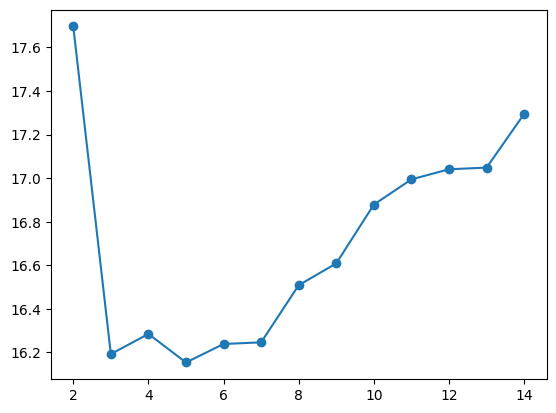

In [75]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

### On voit que le plus optimisé serait les 5 voisins mais on aurait toujours 16% d'erreur, cherchonc la meilleure combinaison de variables à prendre en compte pour avoir le knn le plus précis

In [76]:
import itertools

col_names = d_pnns.columns
combinations = itertools.combinations(col_names, 3)

error_min=100
for i in range(1, len(col_names)):
    combinations = itertools.combinations(col_names, i)
    for comb in combinations:
        labels = []
        for val in comb:
            labels.append(val)
        df = d_pnns.drop(labels = labels, axis=1)
        x_train, x_test, y_train, y_test = tts(df, target, train_size=0.75, random_state=42)
        for k in range(2,15):
            knn = neighbors.KNeighborsClassifier(k)
            error=(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
            if error_min>error:
                error_min=error
                comb_opti=comb
                k_opti=k
            
print(error_min, comb_opti, k_opti)

13.430533055619842 ('energy_100g',) 5


### On voit que le KNN le plus optimisé serait après avoir enlevé la variable energy avec 3 voisins

In [77]:
df=d.drop(labels=d.loc[d['pnns_groups_1'].isnull()].index, axis=0)

In [78]:
df.drop(labels = 'energy_100g', axis=1, inplace = True)

In [79]:
d_knn=d.drop(labels=df.index, axis=0)
target=df['pnns_groups_1']
df.drop(labels='pnns_groups_1', axis=1, inplace=True)
x_train, x_test, y_train, y_test = tts(df, target, train_size=0.75)

In [80]:
knn = neighbors.KNeighborsClassifier(5)
knn.fit(x_train, y_train).score(x_test, y_test)

0.8678546632723907

In [81]:
d_knn_predict = d_knn.drop(labels=['pnns_groups_1','energy_100g'], axis=1)

In [82]:
prediction = knn.predict(d_knn_predict)

In [83]:
data.loc[data['pnns_groups_1'].isnull(),'pnns_groups_1'] = prediction

In [84]:
data

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,http://world-fr.openfoodfacts.org/produit/3396...,Chocolat Noir Costa Rica 75% De Cacao,Bonneterre,Sugary snacks,556.0,44.0,27.000000,30.000000,24.000000,10.000000,0.030000,0.011811
19,http://world-fr.openfoodfacts.org/produit/3263...,Dégustation Lait,Franprix,Sugary snacks,572.4,38.0,22.000000,50.000000,49.000000,7.600000,0.190000,0.074803
22,http://world-fr.openfoodfacts.org/produit/8410...,Biscuits Petit-Déjeuner Céréales Complètes San...,Gullon,Sugary snacks,413.2,14.0,1.300000,65.000000,1.400000,6.800000,0.650000,0.255906
23,http://world-fr.openfoodfacts.org/produit/2404...,Galletas Tostadas,Aurada,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
25,http://world-fr.openfoodfacts.org/produit/8430...,Galletas Tostadas,SuperSol,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
...,...,...,...,...,...,...,...,...,...,...,...,...
257765,http://world-fr.openfoodfacts.org/produit/4005...,Pâté Shiitake,Tartex,Fruits and vegetables,214.7,17.9,4.749687,6.400000,16.592037,7.000000,1.267303,0.498955
257766,http://world-fr.openfoodfacts.org/produit/7520...,Coriandre Gourmet Garden,Gourmet Garden,Sugary snacks,10.0,0.3,4.749687,33.922107,16.592037,7.099545,0.127000,0.050000
257768,http://world-fr.openfoodfacts.org/produit/5601...,Spaghetti classica,Nacional,Cereals and potatoes,348.2,1.8,0.400000,71.000000,5.000000,12.000000,0.010160,0.004000
257769,http://world-fr.openfoodfacts.org/produit/5601...,Soupe de queue de boeuf (potage oxtail),Maggi,Composite foods,366.3,11.9,0.500000,51.800000,7.200000,13.000000,14.732000,5.800000


# Sauvegarder le dataframe

In [85]:
data.to_csv("data_clean.csv", index=False)